In [3]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt #data viz
from matplotlib.pyplot import figure
from matplotlib.gridspec import GridSpec #data viz
import seaborn as sns #data viz
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("datapatient.csv")
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Data Dictionary
| Unnamed: 0 | Category | Age | Sex | ALB | ALP | ALT | AST | BIL | CHE | CHOL | CREA | GGT | PROT |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Patient Identifier | 0 = Blood Donor; 0s = Suspect of Blood Donor; 1 = Hepatitis; 2 = Fibrosis; 3 = Cirrhosis | the period of time someone has been alive (in years) | Female (F) or Male (M) | **Albumin** | **Alkaline Phosphatase** | **Alanine Transaminase** | **Aspartate Aminotransferase** | **Bilirubin** | **Cholinesterase** | **Cholesterol** | **Creatine** | **Gamma-Glutamyl Transferase** | **Protein** |

# Data Structure

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


<span style="color: #000508; font-family: Segoe UI; font-size: 1.5em; font-weight: 300;">**615 baris data dan 14 kolom** terdiri dari :</span>

| Index | Features | Label |
| --- | --- | --- |
| 1 column | 12 column | 1 column |

In [6]:
data.describe()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,615.000000,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000,614.000000
mean,308.000000,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171,72.044137
std,177.679487,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071,5.402636
min,1.000000,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000,44.800000
25%,154.500000,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000,69.300000
50%,308.000000,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000,72.200000
75%,461.500000,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000,75.400000
max,615.000000,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000,90.000000


# Exploratory Data Analysis

## Sebaran Keseluruhan Data

In [7]:
data.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Univariate Analysis

In [8]:
feature_cols = [col for col in data.columns if col not in ['Category']]
target_cols = ['Category']

cat_cols = ['Sex']
num_cols = [col for col in feature_cols if col not in cat_cols]

In [9]:
num_cols

['Unnamed: 0',
 'Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

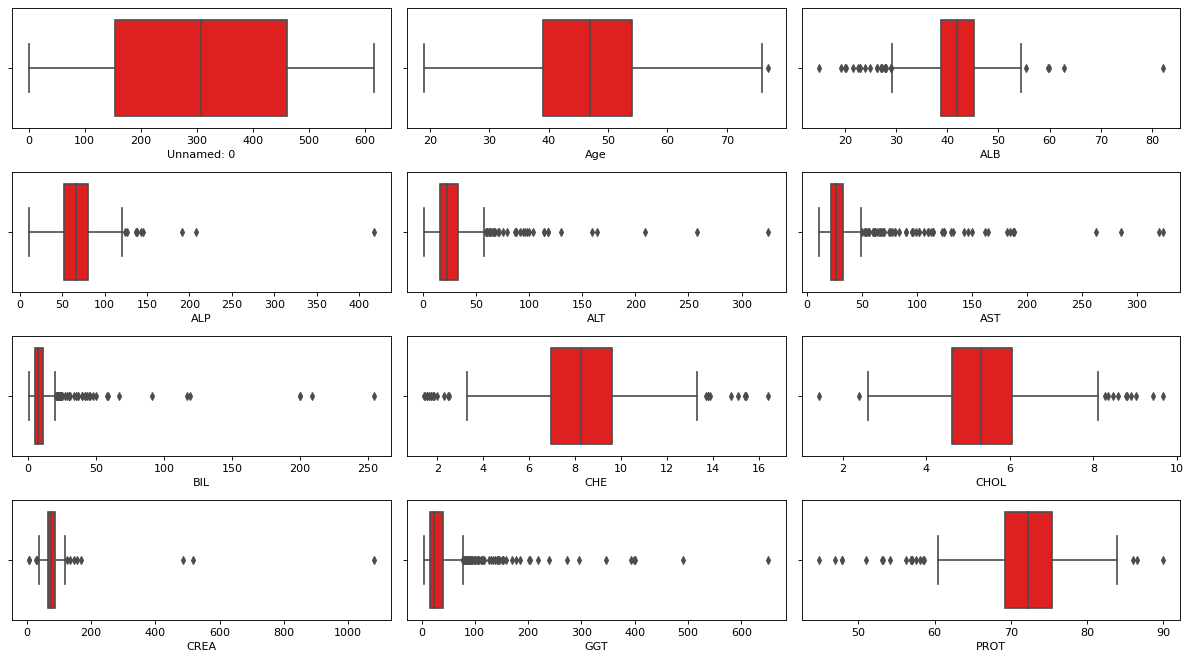

In [10]:
figure(figsize=(15, 10), dpi=80)
for i in range(0, len(num_cols)):
    plt.subplot(5, len(num_cols)/4, i+1)
    sns.boxplot(data[num_cols[i]], color='red', orient= "x")
    plt.tight_layout()

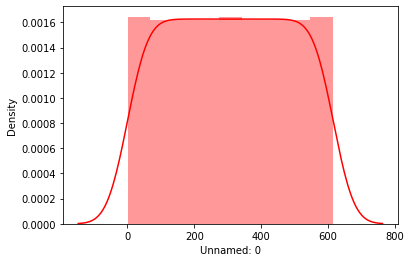

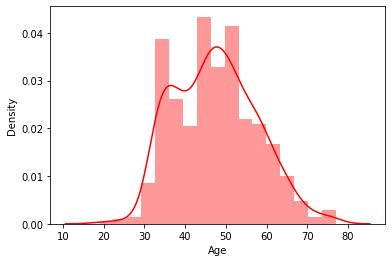

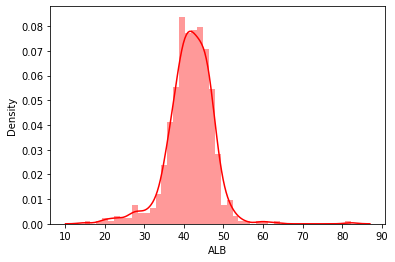

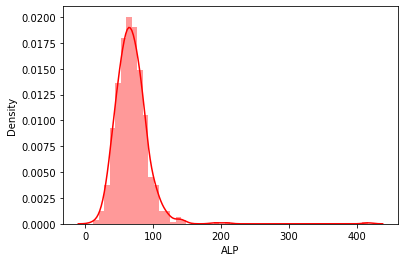

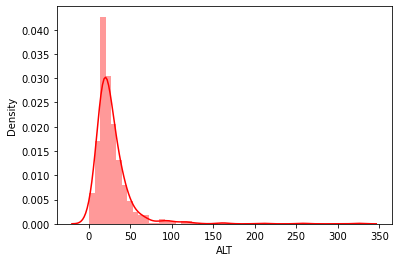

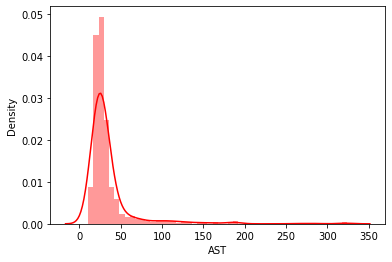

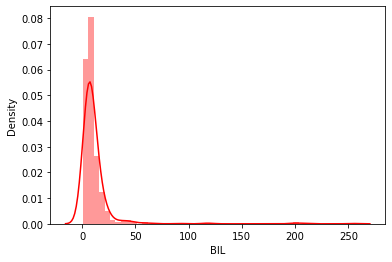

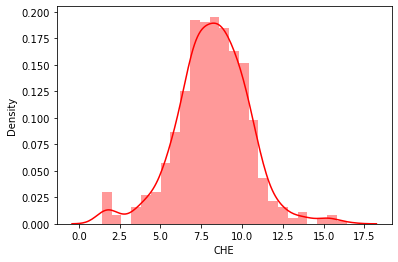

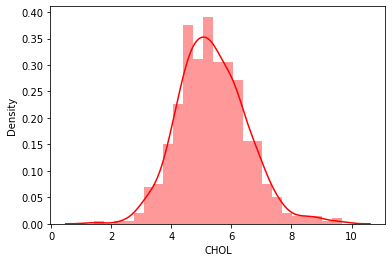

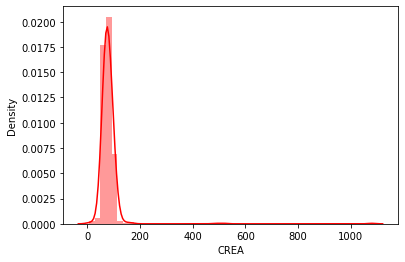

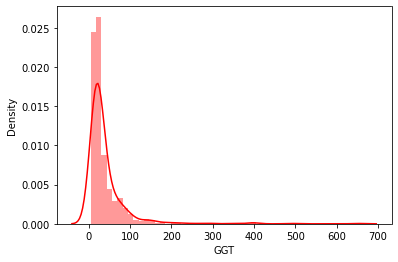

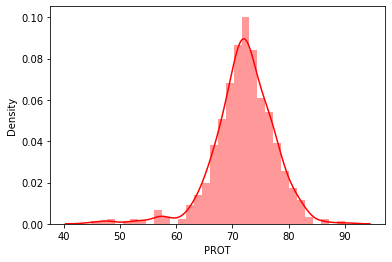

In [11]:
for i in range(len(num_cols)):
    sns.distplot(data[num_cols[i]], color="red")
    plt.show()

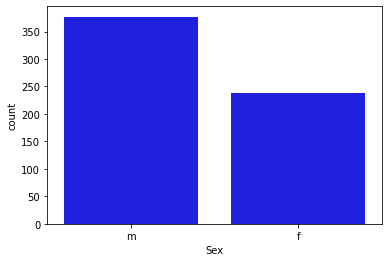

In [12]:
# count plot : categorical (cat)
for i in range(0, len(cat_cols)):
    sns.countplot(data[cat_cols[i]], color="blue", orient="v")
    plt.show()

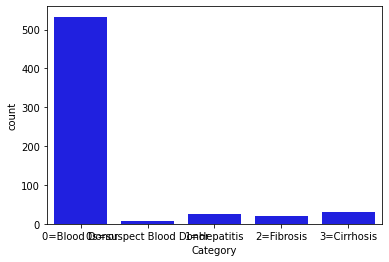

In [13]:
# count plot : categorical (cat)
for i in range(0, len(target_cols)):
    sns.countplot(data[target_cols[i]], color="blue", orient="v")
    plt.show()

## Bivariate Analysis

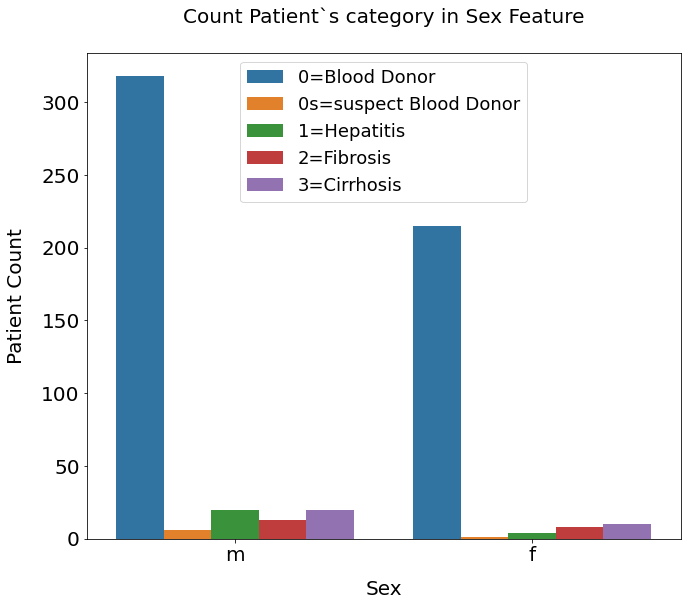

In [14]:
fig, axs = plt.subplots(ncols = 1, nrows = 1, figsize = (6, 6))
plt.subplots_adjust(right = 1.5, top = 1.25)

for i, feature in enumerate(cat_cols, 1):
    plt.subplot(1, 1, i)
    sns.countplot(x = feature, hue = 'Category', data = data)

    plt.xlabel('{}'.format(feature), size = 20, labelpad = 15)
    plt.ylabel('Patient Count', size = 20, labelpad = 15)
    plt.tick_params(axis = 'x', labelsize = 20)
    plt.tick_params(axis = 'y', labelsize = 20)

    plt.legend(['0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis'], loc = 'upper center', prop = {'size': 18})
    plt.title('Count Patient`s category in {} Feature'.format(feature), size = 20, y = 1.05)

plt.show()

In [15]:
data_bivar = data[['Category']]
type(data_bivar)

pandas.core.frame.DataFrame

In [16]:
data_bivar = data_bivar['Category'].apply(lambda x: 1 if x in ['3=Cirrhosis','1=Hepatitis','2=Fibrosis'] else 0)

In [17]:
data_bivar.value_counts()

0    540
1     75
Name: Category, dtype: int64

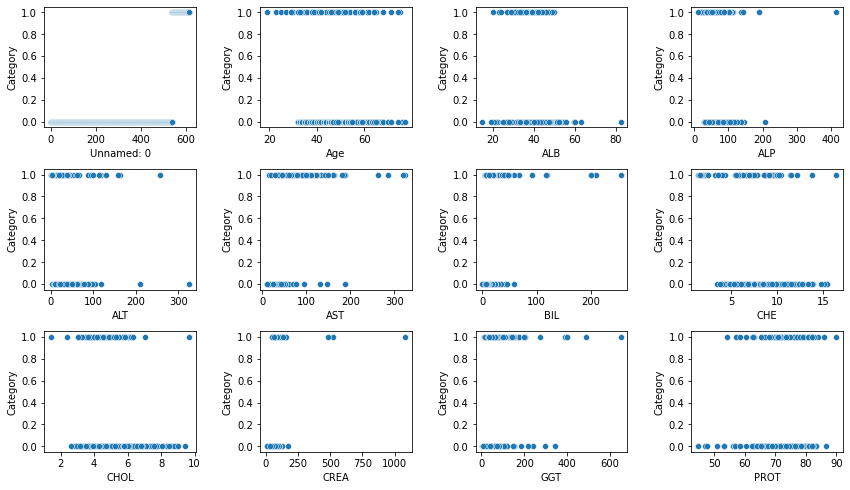

In [18]:
f = plt.figure(figsize=(12,20))

for i in range(len(num_cols)):
    f.add_subplot(9, 4, i+1)
    sns.scatterplot(data[num_cols[i]], data_bivar)
    
plt.tight_layout()
plt.show()

## Multivariate Analysis

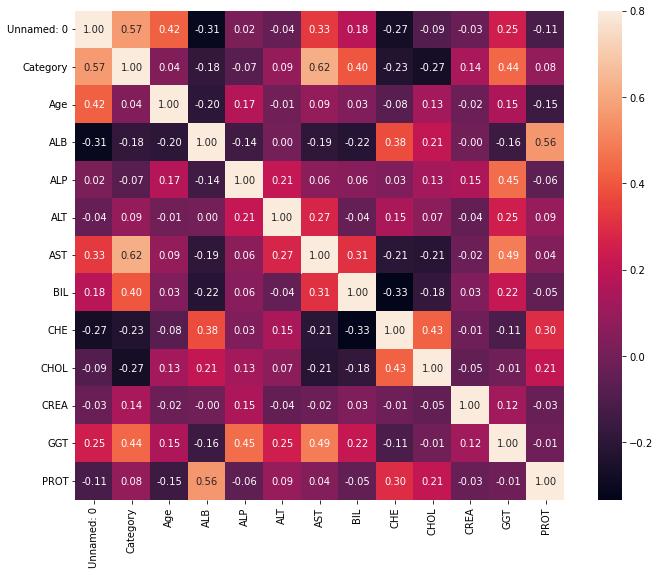

In [19]:
data_copy = data.copy()
data_copy['Category'] = data_copy['Category'].apply(lambda x: 1 if x in ['3=Cirrhosis','1=Hepatitis','2=Fibrosis'] else 0)
corrmat = data_copy.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True, fmt='.2f');

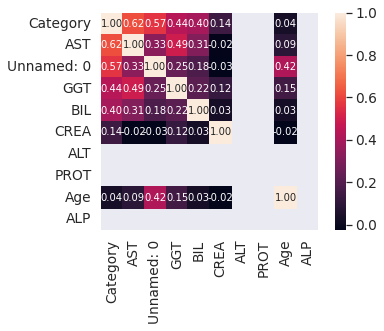

In [20]:
#drug quantity correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Category')['Category'].index
cm = np.corrcoef(data_copy[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Data Preprocessing

## Handling Missing Values

In [21]:
data.isna().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64

In [22]:
# handling with median
data['ALB'].fillna(data['ALB'].median(), inplace=True)
data['ALP'].fillna(data['ALP'].median(), inplace=True)
data['ALT'].fillna(data['ALT'].median(), inplace=True)
data['CHOL'].fillna(data['CHOL'].median(), inplace=True)
data['PROT'].fillna(data['PROT'].median(), inplace=True)

In [23]:
data.isna().sum()

Unnamed: 0    0
Category      0
Age           0
Sex           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
dtype: int64

## Handling Duplicated Values

In [24]:
data.duplicated().sum()

0

## Handling Outlier

In [25]:
num_cols

['Unnamed: 0',
 'Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']

In [26]:
nums = data[['Unnamed: 0',
 'Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CHOL',
 'CREA',
 'GGT',
 'PROT']]
nums.head()

,Unnamed: 0,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [27]:
# using zscore
from scipy import stats

print(f'Jumlah baris sebelum memfilter outlier: {len(data)}')

filtered_entries = np.array([True] * len(data))
for col in nums:
    zscore = abs(stats.zscore(data[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    
data_filtered = data[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data_filtered)}')

Jumlah baris sebelum memfilter outlier: 615
Jumlah baris setelah memfilter outlier: 554


## Feature Selection

In [28]:
data_filtered.columns

Index(['Unnamed: 0', 'Category', 'Age', 'Sex', 'ALB', 'ALP', 'ALT', 'AST',
       'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT'],
      dtype='object')

In [29]:
data_filtered.drop(columns = 'Unnamed: 0', inplace = True)
data_filtered.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


## Feature Engineering

In [30]:
cats = ['Category', 'Sex']
for ftr in cats:
    print(data_filtered[ftr].value_counts(), '\n')

0=Blood Donor    516
1=Hepatitis       17
2=Fibrosis        13
3=Cirrhosis        8
Name: Category, dtype: int64 

m    330
f    224
Name: Sex, dtype: int64 



In [31]:
data_filtered['Sex'] = data_filtered['Sex'].replace({'m':1})
data_filtered['Sex'] = data_filtered['Sex'].replace({'f':0})

data_filtered['Category'] = data_filtered['Category'].apply(lambda x: 1 if x in ['3=Cirrhosis','1=Hepatitis','2=Fibrosis'] else 0)

In [32]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 554 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  554 non-null    int64  
 1   Age       554 non-null    int64  
 2   Sex       554 non-null    int64  
 3   ALB       554 non-null    float64
 4   ALP       554 non-null    float64
 5   ALT       554 non-null    float64
 6   AST       554 non-null    float64
 7   BIL       554 non-null    float64
 8   CHE       554 non-null    float64
 9   CHOL      554 non-null    float64
 10  CREA      554 non-null    float64
 11  GGT       554 non-null    float64
 12  PROT      554 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 60.6 KB


## Data Transformation

In [33]:
from sklearn.preprocessing import StandardScaler
x_data = data_filtered.drop(columns = ['Category'], axis=1)
y_data = data_filtered['Category']

sc = StandardScaler()
x_data2 = sc.fit_transform(x_data)

In [34]:
x_data3 = pd.DataFrame(x_data2, columns=x_data.columns)
x_data3.tail()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
549,1.814433,0.823886,-0.020921,-0.017148,0.915459,1.815738,0.617680,-0.445489,-0.113097,-0.580451,2.857572,1.470494
550,0.498997,-1.213760,-0.677798,-1.569466,-1.659723,0.132956,1.839857,-1.087243,-1.612416,5.354982,4.192124,2.288086
551,1.713246,-1.213760,-2.904501,1.104561,-1.513330,5.024433,5.964707,-3.648774,-1.760375,-0.802525,1.248590,2.133407
552,-0.108128,-1.213760,-2.013820,-0.017148,0.848917,2.386172,1.687085,-2.606610,-1.198131,-1.791764,0.714770,-0.297274
553,1.207309,-1.213760,-1.345809,-0.017148,4.907989,3.669650,0.464907,0.415668,-0.113097,-0.782337,0.113281,-0.960187


## Imbalance Data

In [35]:
hepat = data_filtered['Category'].value_counts()[1]
not_hepat = data_filtered['Category'].value_counts()[0]
hepat_per = hepat / data_filtered.shape[0] * 100
not_hepat_per = not_hepat / data_filtered.shape[0] * 100

print('{} dari {} pasien mengidap penyakit hepatitis dan persentasenya sebesar {:.2f}% dari data set.'.format(hepat, data_filtered.shape[0], hepat_per))
print('{} dari {} pasien tidak mengidap penyakit hepatitis dan persentasenya sebesar {:.2f}% dari data set.'.format(not_hepat, data_filtered.shape[0], not_hepat_per))

38 dari 554 pasien mengidap penyakit hepatitis dan persentasenya sebesar 6.86% dari data set.
516 dari 554 pasien tidak mengidap penyakit hepatitis dan persentasenya sebesar 93.14% dari data set.


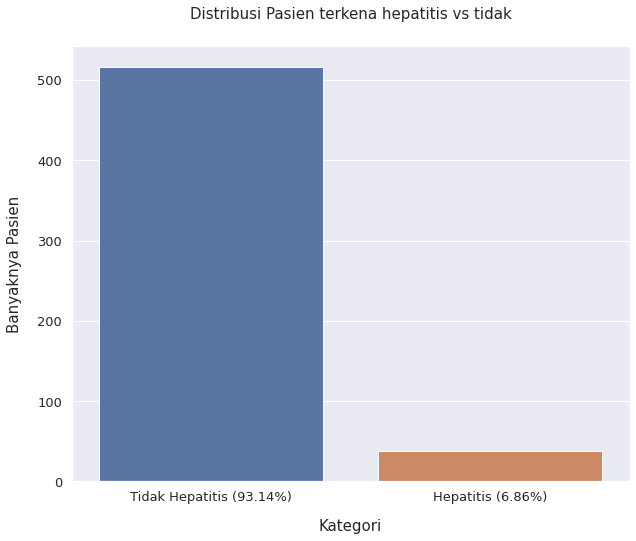

In [36]:
plt.figure(figsize = (10, 8))
sns.countplot(data_filtered['Category'])

plt.xlabel('Kategori', size = 15, labelpad = 15)
plt.ylabel('Banyaknya Pasien', size = 15, labelpad = 15)
plt.xticks((0, 1), ['Tidak Hepatitis ({0:.2f}%)'.format(not_hepat_per), 'Hepatitis ({0:.2f}%)'.format(hepat_per)])
plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 13)

plt.title('Distribusi Pasien terkena hepatitis vs tidak', size = 15, y = 1.05)
plt.show()

In [37]:
# Handling with SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_smote, y_smote = oversample.fit_resample(x_data3, y_data)

In [38]:
len(y_smote == 0)

1032

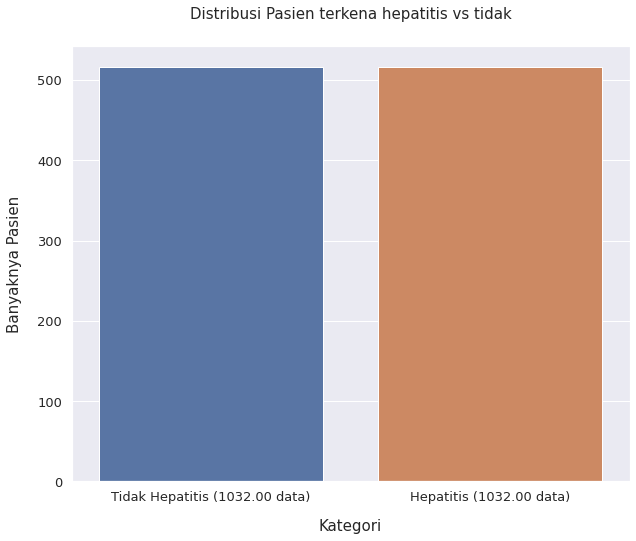

In [39]:
plt.figure(figsize = (10, 8))
sns.countplot(y_smote)

plt.xlabel('Kategori', size = 15, labelpad = 15)
plt.ylabel('Banyaknya Pasien', size = 15, labelpad = 15)
plt.xticks((0, 1), ['Tidak Hepatitis ({0:.2f} data)'.format(len(y_smote == 0)), 'Hepatitis ({0:.2f} data)'.format(len(y_smote == 1))])
plt.tick_params(axis = 'x', labelsize = 13)
plt.tick_params(axis = 'y', labelsize = 13)

plt.title('Distribusi Pasien terkena hepatitis vs tidak', size = 15, y = 1.05)
plt.show()

In [40]:
x_smote.describe()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
count,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000,1032.000000
mean,-0.080834,0.081296,-0.011190,-0.578749,-0.104653,0.990852,0.359279,-0.035555,-0.282546,-0.190850,0.540791,0.275580
std,1.034039,0.933497,0.972422,1.076698,1.200690,1.836293,1.144848,1.128068,0.960944,0.990184,1.301595,1.017155
min,-2.840189,-1.213760,-3.527978,-2.935718,-1.659723,-1.179044,-1.093369,-3.648774,-2.588946,-4.752751,-0.995713,-3.545547
25%,-0.917628,-1.213760,-0.566463,-1.500842,-0.941067,-0.273479,-0.390617,-0.632227,-1.016229,-0.838822,-0.417397,-0.346406
50%,-0.108128,0.823886,0.064853,-0.662338,-0.422038,0.353999,0.109279,0.031597,-0.359696,-0.367002,0.106522,0.188862
75%,0.701371,0.823886,0.658224,0.047975,0.298472,1.594816,0.708820,0.750387,0.374713,0.294386,1.179056,0.996065
max,3.028682,0.823886,2.973995,3.757323,5.147541,7.434519,7.660478,3.043020,3.142004,5.354982,6.466502,3.127776


In [41]:
type(y_smote)

pandas.core.series.Series

In [42]:
df_full = x_smote.copy()
type(df_full)

pandas.core.frame.DataFrame

# Splitting Data

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=12)

In [44]:
x_train.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
987,-0.858608,0.823886,0.744809,-0.693317,-0.104496,0.311614,-0.209846,0.659681,0.392313,-0.025269,-0.422579,-1.854528
370,-0.411690,-1.213760,0.613690,-0.410544,-0.215758,0.111564,-0.360063,0.212720,0.656290,-0.580451,-0.773914,0.100474
207,0.498997,0.823886,-0.610997,-0.155368,-0.368805,-0.230697,-0.696161,-0.028623,-0.063777,0.361681,-0.454373,-1.755682
422,0.195434,-1.213760,-0.722332,2.853577,-0.069365,-0.501653,0.464907,-0.012168,1.672276,-1.791764,-0.465651,-0.363565
137,-0.209316,0.823886,-0.388327,-0.112839,-0.495235,-0.095218,-0.573944,-0.878810,-1.148811,-0.311270,-0.424299,-1.136963


In [45]:
type(y_train)

pandas.core.series.Series

# Machine Learning

In [46]:
from  sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from  sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix

In [47]:
def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.4f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.4f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.4f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.4f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_smote.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

In [48]:
def confusion(y_test,y_test_pred,title):
    names=['Non Hepatitis','Hepatitis']
    cm=confusion_matrix(y_test,y_test_pred)
    f,ax=plt.subplots(figsize=(10,10))
    sns.heatmap(cm,annot=True,linewidth=.5,linecolor="r",fmt=".0f",ax=ax)
    plt.title(title, size = 25)
    plt.xlabel("y_pred")
    plt.ylabel("y_true")
    ax.set_xticklabels(names)
    ax.set_yticklabels(names)
    plt.show()

    return

# Logistic Regression

In [49]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(random_state=42)
model_lr.fit(x_train, y_train)

lr_pred = model_lr.predict(x_test)

eval_classification(model_lr,lr_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9517
Precision (Test Set): 0.9490
Recall (Test Set): 0.9490
F1-Score (Test Set): 0.9490
AUC: 0.95


In [50]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model_lr.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(model_lr.score(x_test, y_test)))

Training set score: 0.9648
Test set score: 0.9517


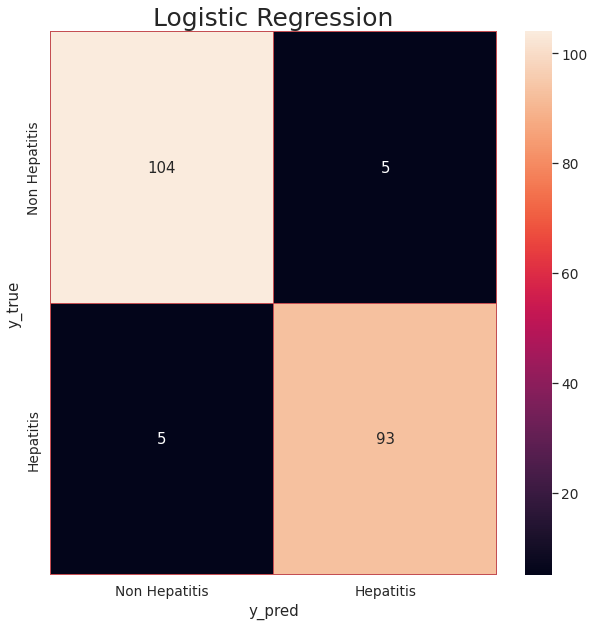

In [51]:
confusion(y_test, lr_pred, "Logistic Regression")

In [52]:
x_test['predicted_cat'] = lr_pred.tolist()
x_test.head()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_cat
487,1.004934,-1.213760,-0.922735,-0.862417,-0.934413,-0.744088,-0.833656,-0.873325,-0.349832,-0.513156,-0.788951,-0.672924,0
816,-1.122514,0.823886,0.436475,-1.780104,-1.105149,0.250878,0.770452,1.706340,0.312562,-0.669820,0.361768,-0.313794,1
866,0.548639,-0.769222,-0.534492,-0.017148,1.227610,0.979512,0.139908,0.716677,-1.809736,0.419212,1.270424,1.470494,1
1008,-2.750133,0.778549,-0.257229,-0.017148,4.062188,2.763319,0.464907,-0.399514,-1.463323,-1.111326,1.252735,0.552194,1
366,-0.411690,-1.213760,0.457821,-1.335555,-0.575085,-0.622870,-0.237845,-0.434519,0.626699,-0.647746,-0.364150,0.188862,0


In [53]:
y_test.head()

487     0
816     1
866     1
1008    1
366     0
Name: Category, dtype: int64

In [54]:
x_test.drop('predicted_cat', axis=1, inplace=True)

# Support Vector Machine

In [55]:
# Apply SVM Model
from sklearn.svm import SVC

svc=SVC() 
svc.fit(x_train, y_train)
svc_pred=svc.predict(x_test)
eval_classification(svc, svc_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9952
Precision (Test Set): 0.9899
Recall (Test Set): 1.0000
F1-Score (Test Set): 0.9949
AUC: 1.00


In [56]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(svc.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(svc.score(x_test, y_test)))

Training set score: 0.9939
Test set score: 0.9952


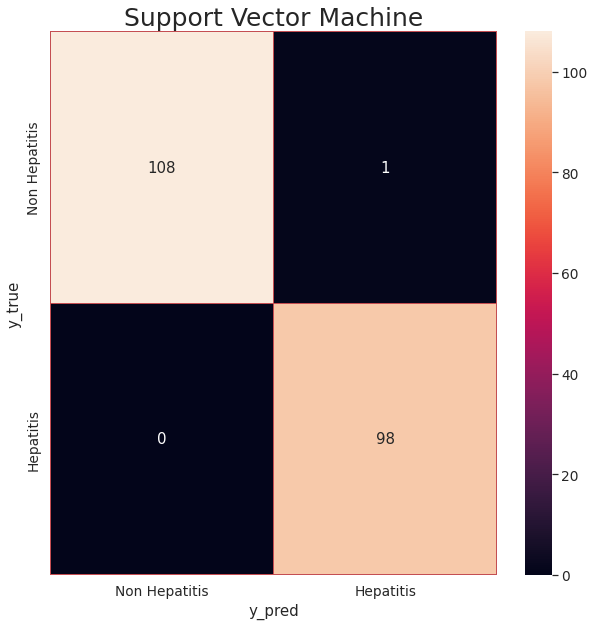

In [57]:
confusion(y_test, svc_pred, "Support Vector Machine")

In [58]:
x_test['predicted_cat'] = svc_pred.tolist()
x_test.iloc[9:14, :]

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_cat
39,-1.221190,0.823886,1.192633,-0.639138,-0.508543,-0.494523,0.205195,-0.116385,0.804250,-0.849632,-0.108518,0.365639,0
844,-0.651017,-1.213760,-0.968487,-0.958379,-0.226578,2.716131,0.764978,-0.771011,-1.125363,-1.408148,0.465174,0.517791,1
853,1.100515,0.823886,-0.515223,-1.502912,-1.184556,0.811481,0.881993,-0.086014,0.192658,-0.426184,1.463317,-0.699682,1
504,1.409683,-1.213760,0.301951,-1.011269,-0.894488,-0.801131,-0.512835,-0.434519,0.389964,-0.513156,-0.721284,-0.540342,0
188,0.296622,0.823886,1.014496,-0.011832,-0.448655,-0.344783,1.457927,-0.023138,0.311052,0.900042,-0.710006,0.962261,0


In [59]:
y_test[9:14]

39     0
844    1
853    1
504    0
188    0
Name: Category, dtype: int64

In [60]:
x_test.drop('predicted_cat', axis = 1, inplace = True)

# Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=17)

dt.fit(x_train, y_train)
dt_pred=dt.predict(x_test)
eval_classification(dt, dt_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9565
Precision (Test Set): 0.9588
Recall (Test Set): 0.9490
F1-Score (Test Set): 0.9538
AUC: 0.96


In [62]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(dt.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9565


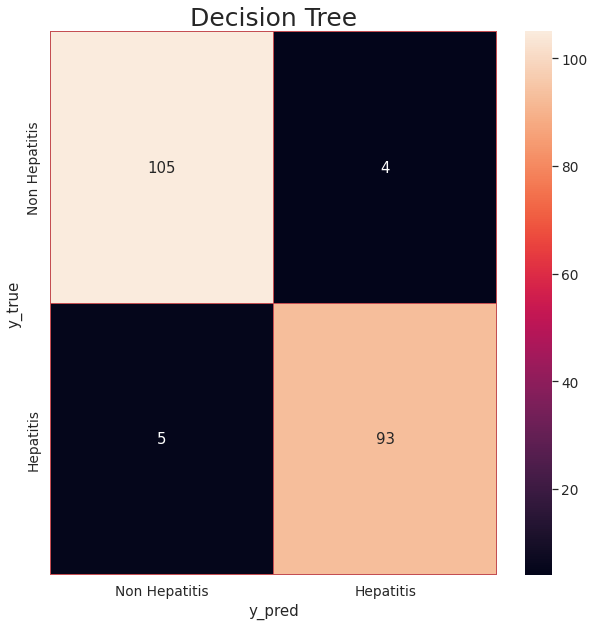

In [63]:
confusion(y_test, dt_pred, "Decision Tree")

In [64]:
x_test['predicted_cat'] = dt_pred.tolist()
x_test.tail()

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_cat
572,-1.550472,0.823886,-0.232457,-1.668499,-0.995756,2.444275,-0.451726,2.902754,0.059439,-2.180035,0.388092,-0.361300,1
130,-0.310503,0.823886,1.170366,-1.202651,-0.668244,-0.658523,-0.650330,0.936750,0.429420,1.438404,-0.604746,-0.253080,0
441,0.397809,-1.213760,0.235150,-0.761410,-0.515197,-0.316262,-0.130904,-0.434519,1.327038,-1.253403,-0.510763,-0.098400,0
719,-0.324848,-0.465395,-0.023558,-0.569695,0.515560,0.992339,-0.049518,1.059097,-1.906401,0.208791,1.037411,1.227026,1
301,2.421558,0.823886,-0.677798,1.136458,-0.009477,0.254173,0.495462,1.090332,0.883161,0.765452,2.583143,-0.562439,0


In [65]:
y_test.tail()

572    1
130    0
441    0
719    1
301    0
Name: Category, dtype: int64

In [66]:
x_test.drop('predicted_cat', axis = 1, inplace = True)

# K-Nearest Neighbor

In [67]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
eval_classification(knn, knn_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9710
Precision (Test Set): 0.9423
Recall (Test Set): 1.0000
F1-Score (Test Set): 0.9703
AUC: 0.97


In [68]:
# Cek overfitting
# print the scores on training and test set
print('Training set score: {:.4f}'.format(knn.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(knn.score(x_test, y_test)))

Training set score: 0.9891
Test set score: 0.9710


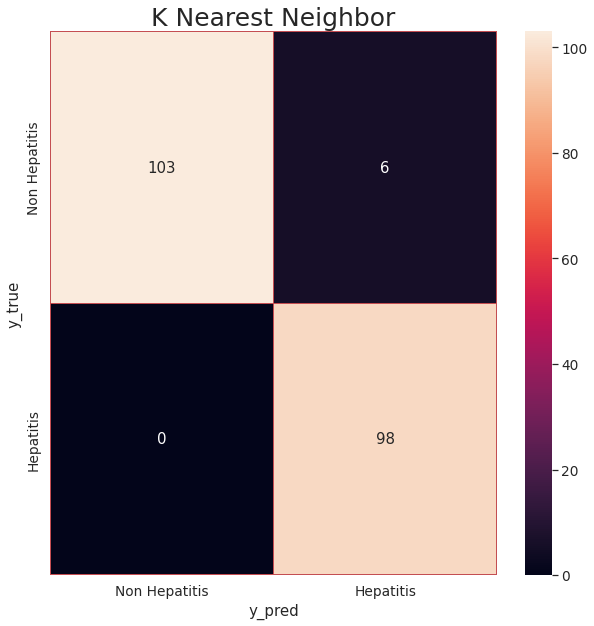

In [69]:
confusion(y_test, knn_pred, "K Nearest Neighbor")

In [70]:
x_test['predicted_cat'] = knn_pred.tolist()
x_test.head(10)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_cat
487,1.004934,-1.213760,-0.922735,-0.862417,-0.934413,-0.744088,-0.833656,-0.873325,-0.349832,-0.513156,-0.788951,-0.672924,0
816,-1.122514,0.823886,0.436475,-1.780104,-1.105149,0.250878,0.770452,1.706340,0.312562,-0.669820,0.361768,-0.313794,1
866,0.548639,-0.769222,-0.534492,-0.017148,1.227610,0.979512,0.139908,0.716677,-1.809736,0.419212,1.270424,1.470494,1
1008,-2.750133,0.778549,-0.257229,-0.017148,4.062188,2.763319,0.464907,-0.399514,-1.463323,-1.111326,1.252735,0.552194,1
366,-0.411690,-1.213760,0.457821,-1.335555,-0.575085,-0.622870,-0.237845,-0.434519,0.626699,-0.647746,-0.364150,0.188862,0
876,1.005194,0.823886,0.580096,-0.017148,0.649376,1.293008,0.719495,0.018765,-0.967697,1.303207,5.262751,1.028694,1
388,-0.209316,-1.213760,-1.011804,-0.649771,-0.887833,-0.979392,-0.467003,-0.747168,-0.122961,-0.849632,0.692214,-0.496148,0
574,1.765406,0.823886,0.015941,-0.153236,0.748343,1.933778,0.531321,-0.359116,-0.180804,-0.607623,2.822053,1.304543,1
320,-1.423565,-1.213760,-0.187923,0.349667,-0.794674,-0.551566,0.327412,-0.500340,-2.164797,-1.522583,-0.736321,-0.540342,0
39,-1.221190,0.823886,1.192633,-0.639138,-0.508543,-0.494523,0.205195,-0.116385,0.804250,-0.849632,-0.108518,0.365639,0


In [71]:
y_test.head(10)

487     0
816     1
866     1
1008    1
366     0
876     1
388     0
574     1
320     0
39      0
Name: Category, dtype: int64

In [72]:
x_test.drop('predicted_cat', axis = 1, inplace = True)

# Random Forest

In [73]:
# Bagging (random forest)

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)

rf_pred = rf.predict(x_test)
eval_classification(rf, rf_pred, x_train, y_train, x_test, y_test)

Accuracy (Test Set): 0.9903
Precision (Test Set): 0.9898
Recall (Test Set): 0.9898
F1-Score (Test Set): 0.9898
AUC: 0.99


In [74]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(rf.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(rf.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9903


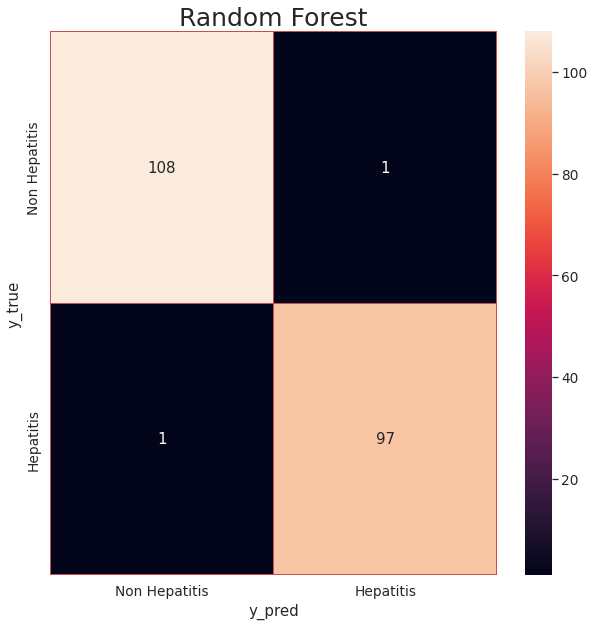

In [75]:
confusion(y_test, rf_pred, "Random Forest")

In [76]:
x_test['predicted_cat'] = rf_pred.tolist()
x_test.tail(3)

,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,predicted_cat
441,0.397809,-1.213760,0.235150,-0.761410,-0.515197,-0.316262,-0.130904,-0.434519,1.327038,-1.253403,-0.510763,-0.098400,0
719,-0.324848,-0.465395,-0.023558,-0.569695,0.515560,0.992339,-0.049518,1.059097,-1.906401,0.208791,1.037411,1.227026,1
301,2.421558,0.823886,-0.677798,1.136458,-0.009477,0.254173,0.495462,1.090332,0.883161,0.765452,2.583143,-0.562439,0


In [77]:
y_test.tail(3)

441    0
719    1
301    0
Name: Category, dtype: int64

In [78]:
x_test.drop('predicted_cat', axis = 1, inplace = True)

# X Gradient Boost - Ensemble Learning

In [79]:
# Boosting (XGBoost)

from xgboost import XGBClassifier
xg = XGBClassifier(random_state=50)
xg.fit(x_train, y_train)

y_pred = xg.predict(x_test)
print('\n')
eval_classification(xg, y_pred, x_train, y_train, x_test, y_test)



Accuracy (Test Set): 0.9807
Precision (Test Set): 0.9700
Recall (Test Set): 0.9898
F1-Score (Test Set): 0.9798
AUC: 0.98


In [80]:
# Cek overfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(xg.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(xg.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9807


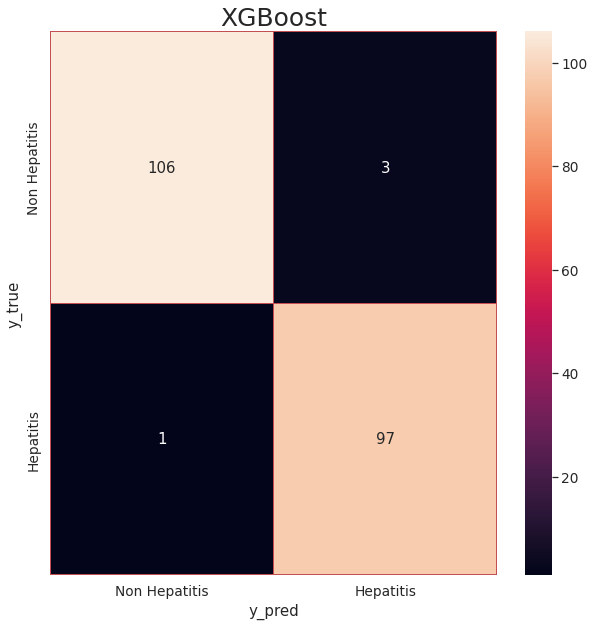

In [81]:
confusion(y_test, y_pred, "XGBoost")

# Export Model to Pickle File

In [84]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(knn, open(filename, 'wb'))
print("Model exported")

Model exported
